# Final Project - Boston Housing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


### TASK 4

<AxesSubplot:ylabel='MEDV'>

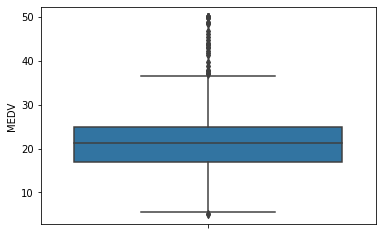

In [4]:
sns.boxplot(y = 'MEDV', data = boston_df) 

In [5]:
boston_df['MEDV'].median()

21.2

 The above boxplot of the variable MEDV shows us the location of the median, minimum, maximum, 1st and 3rd quartile, and outlier values.

array([[<AxesSubplot:title={'center':'CHAS'}>]], dtype=object)

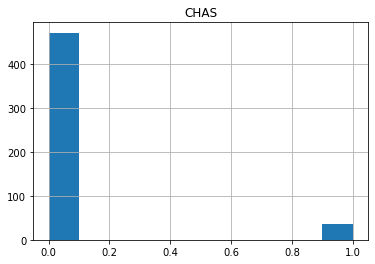

In [6]:
boston_df.hist('CHAS')

<AxesSubplot:xlabel='age_group', ylabel='MEDV'>

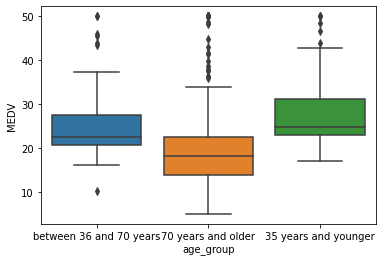

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 36 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
sns.boxplot(x = 'age_group', y = 'MEDV', data = boston_df)

The above plot shows differences in various quantities of data based on age groups.

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

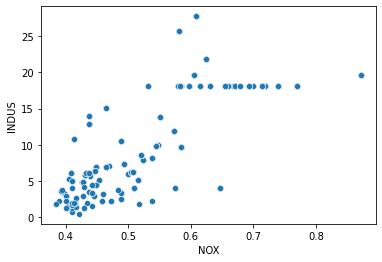

In [8]:
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

The proportion of non-retail business acres per town increases with the nitric oxide concentrations.

array([[<AxesSubplot:title={'center':'PTRATIO'}>]], dtype=object)

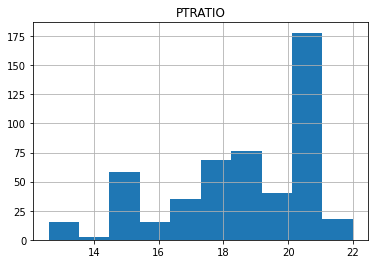

In [9]:
boston_df.hist('PTRATIO')

In [10]:
boston_df['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

### TASK 5:

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis : There is no difference in median value of houses bounded by the Charles river. <br>
Alt  Hypothesis : There is a difference in median value of houses bounded by the Charles river 

T-test cannot be used because there is no continous dependent variable.

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis : There is no difference in the Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE). <br>
Alt  Hypothesis : At least one of the median values differ.

In [11]:
A1= boston_df[boston_df['age_group'] =='35 years and younger']['MEDV']
A2= boston_df[boston_df['age_group'] == 'between 36 and 70 years']['MEDV']
A3= boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [12]:
f_statistic, p_value = scipy.stats.f_oneway(A1, A2, A3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


The p-value is less than 0.05, so we will reject the null hypothesis. Our result shows at least one of the median values is different.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypo : There is no relationship.<br>
Alt Hypo  : There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. 

In [13]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'] )

(0.7636514469209161, 7.913361061230596e-98)

Correlation coefficient is 0.7636 and p-value is less than 0.05 so we reject the null hypothesis and conclude that there is a relationship.

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null Hypo : There is no impact of weighted distance on the medain value of owner occupoed homes. <br>
Alt Hypo  : There is an impact.

In [14]:
X = boston_df['MEDV']
y = boston_df['DIS']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

/Users/sumeetchougule/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DIS   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 26 Apr 2022   Prob (F-statistic):           1.21e-08
Time:                        18:09:10   Log-Likelihood:                -1078.0
No. Observations:                 506   AIC:                             2160.
Df Residuals:                     504   BIC:                             2168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5057      0.240     10.428      0.000       2.034       2.978
MEDV           0.0572      0.010      5.795      0.000       0.038       0.077
==============================================================================
Omnibus:                       70.837   Durbin-Watson:                   0.138
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.167
Skew:                           1.000   Prob(JB):                     4.82e-22
Kurtosis:                       3.809   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

p-value is less than 0.05 so we reject the null hypothesis and conclude that there is an impact.